# Day 19 - Workout Bivariate Stats Cat/Cat

Download the accidents_2021_reduced.csv dataset and explore this data by discovering which features have an effect on traffic severity. 

The severity score ranges from 1-4 and indicates the level of impact on traffic flow:

1. no impact on traffic
2. minor traffic impact
3. moderate traffic impact
4. major traffic impact

Begin by calculating the Pearson Chi-Square statistic and p-value for the relationship between time zone and severity. Does severity different across time zones?

In [49]:
import pandas as pd

df = pd.read_csv('data/accidents_2021_reduced.csv')

In [50]:
df.Severity.unique()

array([2, 4], dtype=int64)

In [51]:
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

crosstab = pd.crosstab(df['Severity'], df['Timezone'])
X, p, dof, contingency_table = chi2_contingency(crosstab)

print(f'X square:\t{round(X, 4)}')
print(f'p-value:\t{round(p, 10)}')
print(f'DoF:\t\t{dof}\n')

X square:	40.4837
p-value:	8.4e-09
DoF:		3



In [52]:
contingency_table

array([[1643.24789748, 4778.21065278,  504.78213857, 2901.75931117],
       [  26.75210252,   77.78934722,    8.21786143,   47.24068883]])

Demonstrate a heatmap of Severity and Timezone. Which time zone has the most accidents?


In [53]:
df.Timezone.unique()

array(['US/Pacific', 'US/Central', 'US/Eastern', 'US/Mountain', nan],
      dtype=object)

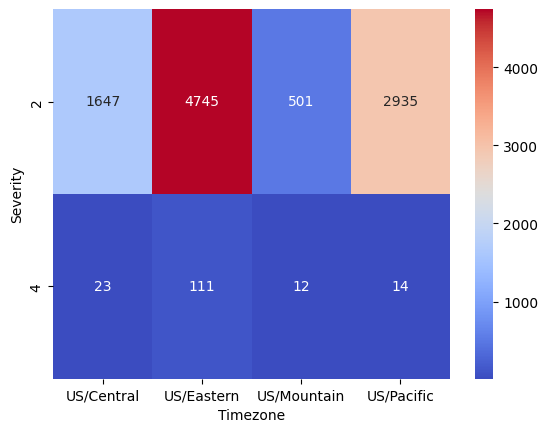

In [54]:
sns.heatmap(pd.crosstab(df.Severity, df.Timezone), annot=True, fmt='d', cmap='coolwarm');

In [55]:
ct_df = pd.DataFrame(contingency_table, columns=crosstab.columns, index=crosstab.index)

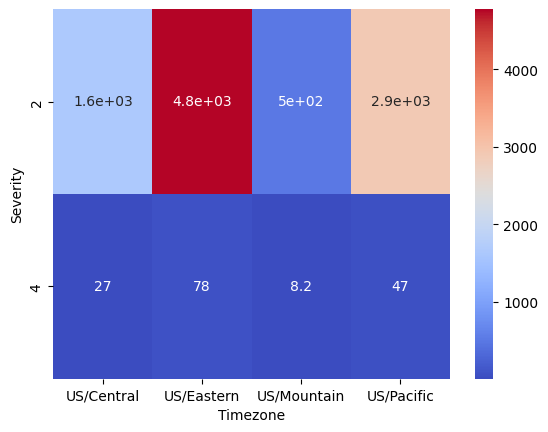

In [56]:
#ct_df = pd.DataFrame(contingency_table, columns=crosstab.columns, index=crosstab.index)
sns.heatmap(ct_df, annot=True, cmap='coolwarm');

Finally, let's see what the effect of the crash distance is on the severity. However, crash distance is numeric. Therefore, convert crash distance into five equally-sized (or nearly equal) bins first and calculate a X2 statistic and p-value between this new binned version of crash distance and severity. Create and crosstab and heatmap overlay again. Is there a significant effect of crash distance on severity?

HINT: If you choose to iterate over the rows using .itertuples(), then you may find it helpful to rename Distance(mi) to "distance" or some version without the "(mi)" portion.

In [57]:
df['distance'] = df['Distance(mi)']

In [58]:
crosstab = pd.crosstab(df['Severity'], df['distance'])
X, p, dof, contingency_table = chi2_contingency(crosstab)

print(f'X square:\t{round(X, 4)}')
print(f'p-value:\t{round(p, 10)}')
print(f'DoF:\t\t{dof}\n')

X square:	2819.7915
p-value:	0.0008460106
DoF:		2588



In [59]:
crosstab

distance,0.000,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,15.535,15.748,17.715,17.776,21.422,22.153,23.893,26.408,41.732,65.805
Severity,,,,,,,,,,,,,,,,,,,,,
2,1,1,3,9,17,20,24,38,50,34,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
import numpy as np
from scipy import stats

q1 = np.quantile(df['distance'], .20)
q2 = np.quantile(df['distance'], .40)
q3 = np.quantile(df['distance'], .60)
q4 = np.quantile(df['distance'], .80)


# Step 3. Iterate through the feature to be binned and convert each value to the quartile cutoff using the
# .itertuples() method of Pandas DataFrames which allows us to loop through ever row one-at-a-time.
for row in df.itertuples(): 
    if row.distance < q1:
        df.loc[row.Index, 'distance'] = q1 
    elif row.distance >= q1 and row.distance < q2:
        df.loc[row.Index, 'distance'] = q2
    elif row.distance >= q2 and row.distance < q3:
        df.loc[row.Index, 'distance'] = q3
    elif row.distance >= q3 and row.distance < q4:
        df.loc[row.Index, 'distance'] = q4
    else:
        df.loc[row.Index, 'distance'] = df['distance'].max()

# Step 4. Use the new list (actually a DataFrame of one column) in place of the raw data to create the new contingency table
contingency_table2 = pd.crosstab(df['Severity'], df['distance'])

stat, p, dof, expected = stats.chi2_contingency(contingency_table2)
print("Chi-square stat: " + str(stat))
print("P-value: " + str(p))

# Output:
# Chi-square stat: 108.11272522421773
# P-value: 4.120737539625209e-07


Chi-square stat: 4.588290452332574
P-value: 0.3322065027157303


In [61]:
contingency_table2

distance,0.0770,0.1900,0.4920,1.1774,65.8050
Severity,,,,,
2,1957,1981,1958,1980,1964
4,31,27,40,26,36
